In [81]:
import pandas as pd
import numpy as np
import nltk

In [82]:
url = 'https://towardsdatascience.com/data-science-and-machine-learning-interview-questions-3f6207cf040b'

In [83]:
import os
os.getcwd()

'F:\\DSE\\Text analysis'

In [84]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')

In [85]:
browser.get(url)

In [86]:
div_tag = browser.find_element_by_css_selector('div')
para_tags = div_tag.find_elements_by_css_selector('li')
len(para_tags)

56

In [87]:
para_tags

[<selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-2")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-3")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-4")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-5")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-6")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-7")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7ea8", element="0.24992136697208034-8")>,
 <selenium.webdriver.remote.webelement.WebElement (session="388d785b3278c0541223d5d9b04e7e

In [88]:
import bs4

In [89]:
sentences = ''
for para in para_tags:
    para_text = para.get_attribute('innerHTML')
    sentences = sentences + ' ' + para_text
    sentences = bs4.BeautifulSoup(sentences, 'html.parser').text
sentences[:10]

' Home Data'

In [90]:
sentences

' Home Data Science Machine Learning Programming Visualization AI Journalism Picks Contribute  Home Data Science Machine Learning Programming Visualization AI Journalism Picks Contribute  What’s the trade-off between bias and variance? What is gradient descent? Explain over- and under-fitting and how to combat them? How do you combat the curse of dimensionality? What is regularization, why do we use it, and give some examples of common methods? Explain Principal Component Analysis (PCA)? Why is ReLU better and more often used than Sigmoid in Neural Networks? What is data normalization and why do we need it? I felt this one would be important to highlight. Data normalization is very important preprocessing step, used to rescale values to fit in a specific range to assure better convergence during backpropagation. In general, it boils down to subtracting the mean of each data point and dividing by its standard deviation. If we don’t do this then some of the features (those with high magn

In [91]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

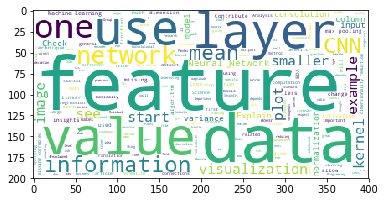

In [92]:
wc = WordCloud(background_color="white").generate(sentences)
plt.imshow(wc)

## Ans2):

In [93]:
amazon = pd.read_csv('amazon_reviews_exam.csv')
amazon.shape

(999, 10)

In [94]:
from sklearn.feature_extraction.text import CountVectorizer

In [95]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [96]:
documents = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z #@]', '')
documents.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

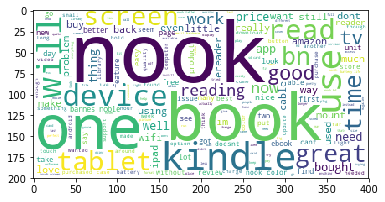

In [97]:
wc = WordCloud(background_color="white").generate(' '.join(documents))
plt.imshow(wc)

- I am not doing any stemming and also not adding extra useless words into stopwords and i am only removing the stop words from the data.

In [98]:
stop_words = nltk.corpus.stopwords.words('english')
len(stop_words)

179

In [99]:
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [word for word in row_words \
                 if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)

docs_clean = documents.apply(lambda v: clean_text(v))
docs_clean.head()

0    got gps husband otr road trucker  impressed sh...
1    im professional otr truck driver bought tnd  t...
2    well say  ive unit truck four days  prior garm...
3    going write long review even thought unit dese...
4    ive mine year heres got tries route non truck ...
Name: reviewText, dtype: object

## Document-Term matrix

In [100]:
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)
numpy_matrix = sparse_matrix.toarray()
dtm = pd.DataFrame(numpy_matrix, columns=cv.get_feature_names())
#df_dtm.head()

In [101]:
dtm.head().T

,0,1,2,3,4
aaa,0,0,0,0,0
aac,0,0,0,0,0
abandoning,0,0,0,0,0
abilities,0,0,0,0,0
ability,0,0,3,1,0
able,0,0,0,0,0
abnormally,0,0,0,0,0
aboutdo,0,0,0,0,0
aboutif,0,0,0,0,0
absence,0,0,0,0,0


In [102]:
dtm.shape

(999, 9444)

- So we have 999 documents and 9444 unique words used by reviewers.

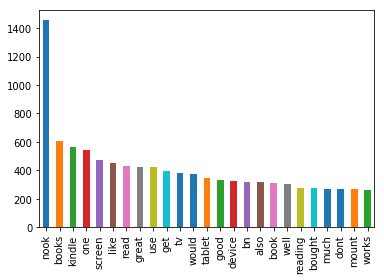

In [103]:
dtm.sum().sort_values(ascending = False).head(25).plot(kind = 'bar')

In [104]:
top = dtm.sum().sort_values(ascending = False).head(25).index
top_corr = dtm[top].corr()

In [105]:
dtm[top].corr()

,nook,books,kindle,one,screen,like,read,great,use,get,...,bn,also,book,well,reading,bought,much,dont,mount,works
nook,1.000000,0.624179,0.635081,0.391148,0.494755,0.561598,0.537788,0.314510,0.474778,0.388400,...,0.447944,0.535857,0.567272,0.379771,0.505899,0.218842,0.451709,0.453738,-0.106126,0.158606
books,0.624179,1.000000,0.484799,0.358252,0.475797,0.523905,0.620132,0.231877,0.515817,0.427794,...,0.608864,0.450277,0.626593,0.346381,0.542385,0.212225,0.468415,0.553093,-0.092219,0.064440
kindle,0.635081,0.484799,1.000000,0.272857,0.476808,0.497994,0.452000,0.148595,0.313229,0.322484,...,0.311951,0.361989,0.380403,0.187412,0.432609,0.175577,0.325738,0.370253,-0.091016,0.063995
one,0.391148,0.358252,0.272857,1.000000,0.367750,0.423817,0.254724,0.190833,0.379005,0.328058,...,0.406645,0.396888,0.348017,0.312124,0.252094,0.189953,0.366585,0.320589,0.075903,0.068904
screen,0.494755,0.475797,0.476808,0.367750,1.000000,0.586531,0.457845,0.230011,0.365401,0.330938,...,0.484497,0.512081,0.379621,0.294437,0.523584,0.186039,0.511650,0.484711,-0.047766,0.082093
like,0.561598,0.523905,0.497994,0.423817,0.586531,1.000000,0.503450,0.321089,0.454838,0.398528,...,0.480499,0.567326,0.352959,0.329450,0.515291,0.198860,0.522381,0.571027,-0.062124,0.065800
read,0.537788,0.620132,0.452000,0.254724,0.457845,0.503450,1.000000,0.266405,0.482329,0.370983,...,0.437515,0.442164,0.529706,0.215725,0.609250,0.207890,0.381865,0.510991,-0.083991,0.063435
great,0.314510,0.231877,0.148595,0.190833,0.230011,0.321089,0.266405,1.000000,0.217605,0.193173,...,0.239502,0.309834,0.189015,0.239083,0.245233,0.075199,0.255515,0.287985,-0.054116,0.269494
use,0.474778,0.515817,0.313229,0.379005,0.365401,0.454838,0.482329,0.217605,1.000000,0.370977,...,0.504998,0.466040,0.407271,0.341314,0.447037,0.218009,0.454252,0.486168,-0.056144,0.154311
get,0.388400,0.427794,0.322484,0.328058,0.330938,0.398528,0.370983,0.193173,0.370977,1.000000,...,0.412641,0.354663,0.356991,0.265807,0.333428,0.152702,0.297201,0.407576,-0.042255,0.076417


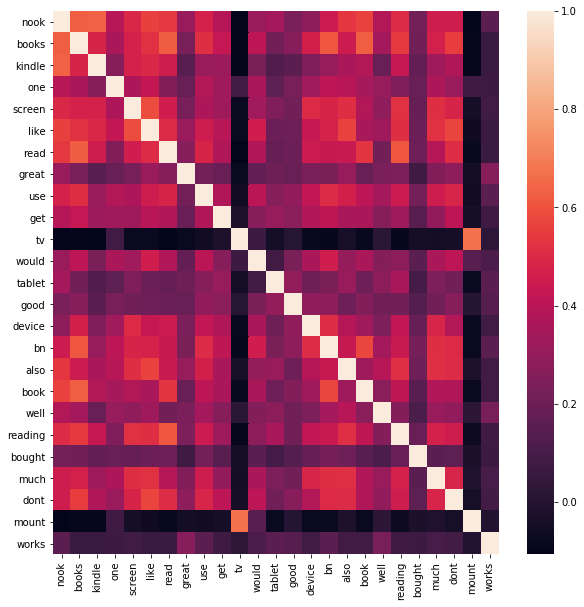

In [106]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(top_corr)

## Ans3):

## K-means clustering

In [144]:
dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
from sklearn.cluster import KMeans

num_clusters = 4

km = KMeans(n_clusters=num_clusters)

%time km.fit(dtm)

clusters = km.labels_.tolist()

Wall time: 7.22 s


In [136]:
from sklearn.externals import joblib

km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [63]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = pd.DataFrame(cosine_similarity(dtm.T),
                       index=dtm.columns,
                       columns=dtm.columns)
cos_sim.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
aac,0.0,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abandoning,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abilities,0.0,0.5,0.0,1.000000,0.051848,0.032616,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.387298,0.00000,0.0,0.000000
ability,0.0,0.0,0.0,0.051848,1.000000,0.202930,0.103695,0.0,0.0,0.0,...,0.0,0.119737,0.0,0.20739,0.0,0.0,0.133870,0.20739,0.0,0.073324


In [137]:
documents = pd.DataFrame(documents)
documents

,reviewText
0,we got this gps for my husband who is an otr o...
1,im a professional otr truck driver and i bough...
2,well what can i say ive had this unit in my t...
3,not going to write a long review even thought ...
4,ive had mine for a year and heres what we got ...
5,i am using this with a nook hd it works as des...
6,the cable is very wobbly and sometimes disconn...
7,this adaptor is real easy to setup and use rig...
8,this adapter easily connects my nook hd # to m...
9,this product really works great but i found th...


In [138]:
clusters = pd.DataFrame(clusters,columns = ['cluster'])
clusters

,cluster
0,1
1,1
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [139]:
c = [documents,clusters]

In [141]:
Amazon_Clusters = pd.concat(c,axis = 1)
Amazon_Clusters

,reviewText,cluster
0,we got this gps for my husband who is an otr o...,1
1,im a professional otr truck driver and i bough...,1
2,well what can i say ive had this unit in my t...,0
3,not going to write a long review even thought ...,1
4,ive had mine for a year and heres what we got ...,1
5,i am using this with a nook hd it works as des...,1
6,the cable is very wobbly and sometimes disconn...,1
7,this adaptor is real easy to setup and use rig...,1
8,this adapter easily connects my nook hd # to m...,1
9,this product really works great but i found th...,1


In [143]:
Amazon_Clusters.cluster.value_counts()

1    831
0    138
3     24
2      6
Name: cluster, dtype: int64

## Ans4) & Ans5):

In [28]:
imdb = pd.read_csv('imdb_sentiment.csv')
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [29]:
imdb.shape

(748, 2)

In [30]:
imdb.sentiment.value_counts()

1    386
0    362
Name: sentiment, dtype: int64

- There is not at all any class imbalance(only 10 are less in 0 class of sentiment)

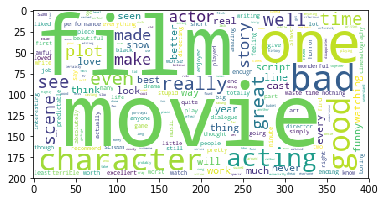

In [31]:
wc = WordCloud(background_color="white").generate(' '.join(imdb['review']))
plt.imshow(wc)

In [32]:
documents = imdb['review'].fillna('').str.lower().str.replace('[^a-z #@]', '')
documents.head()

0    a very very very slowmoving aimless movie abou...
1    not sure who was more lost  the flat character...
2    attempting artiness with black  white and clev...
3          very little music or anything to speak of  
4    the best scene in the movie was when gerardo i...
Name: review, dtype: object

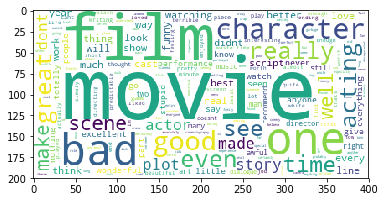

In [33]:
wc = WordCloud(background_color="white").generate(' '.join(documents))
plt.imshow(wc)

In [34]:
stop_words = nltk.corpus.stopwords.words('english')
len(stop_words)

179

In [35]:
stemmer = nltk.PorterStemmer()
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words \
                 if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)

docs_clean = documents.apply(lambda v: clean_text(v))
docs_clean.head(20)

0       slowmov aimless movi distress drift young man  
1     sure lost  flat charact audienc nearli half wa...
2     attempt arti black  white clever camera angl m...
3                             littl music anyth speak  
4     best scene movi gerardo tri find song keep run...
5     rest movi lack art charm mean empti work guess...
6                                       wast two hour  
7     saw movi today thought good effort good messag...
8                                         bit predict  
9               love cast jimmi buffet scienc teacher  
10                                      babi owl ador  
11        movi show lot florida best made look appeal  
12                            song best muppet hilari  
13                                               cool  
14    right case movi deliv everyth almost right face  
15      averag act main person low budget clearli see  
16    review long overdu sinc consid tale two sister...
17    ill put gem movi term screenplay cinematog

In [36]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(docs_clean, test_size=0.8, random_state=100)

In [37]:
v = CountVectorizer()
cv.fit(train)
x_train = cv.transform(train)
x_test = cv.transform(test)

In [38]:
y_train = imdb.loc[train.index]['sentiment']
y_test = imdb.loc[test.index]['sentiment']

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

In [40]:
model_rf = RandomForestClassifier(n_estimators=800, random_state=100)
model_rf.fit(x_train, y_train)
pred_labels = model_rf.predict(x_test)
accuracy_score(y_test, pred_labels)

0.6527545909849749

In [41]:
print('Train:')
print(model_rf.score(x_train,y_train))
print("Test:")
print(model_rf.score(x_test,y_test))

Train:
1.0
Test:
0.6527545909849749


## Decision Tree Clasifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model_dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=100 )
model_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [44]:
print("Train:")
print(model_dt.score(x_train,y_train))
print("Test:")
print(model_dt.score(x_test,y_test))

Train:
0.6845637583892618
Test:
0.5692821368948247


## Bagging Classifier

In [45]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=100, max_samples=.50 , oob_score=True , random_state=1)#oob means out of bag

bgcl = bgcl.fit(x_train, y_train)
print('oob_score:')
print(bgcl.oob_score_)

oob_score:
0.6308724832214765


In [46]:
print('Train:')
bgcl.score(x_train, y_train)


Train:


0.912751677852349

In [47]:
test_pred = bgcl.predict(x_test)
print('Test:')
bgcl.score(x_test , y_test)

Test:


0.5859766277128547

## Gradient Boosting Classifier

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100, random_state=100)
gbcl = gbcl.fit(x_train, y_train)
print('Train:')
gbcl.score(x_train , y_train)

Train:


0.9798657718120806

In [49]:
test_pred = gbcl.predict(x_test)
print('Test:')
gbcl.score(x_test , y_test)

Test:


0.6126878130217028

## The best model among above would be a decison tree since i am achieving very less overfit compared to other models in decison tree.

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


- Notice here we considering the reviews from the original dataset(imdb) since if we do stemming the negative words may go(as in above very was eliminated)

Neutral     310
Positive    242
Negative    196
Name: sentiment_vader, dtype: int64

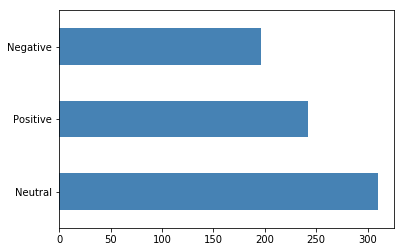

In [51]:
%matplotlib inline
def get_sentiment_score(review):
    compound_score = sentiment.polarity_scores(review)['compound']
    return compound_score

def get_sentiment(score):
    if score >= 0.45:
        return 'Positive'
    elif score < -0.3:
        return 'Negative'
    else:
        return 'Neutral'

imdb['sentiment_score'] = imdb['review'].apply(get_sentiment_score)
imdb['sentiment_vader'] = imdb['sentiment_score'].apply(get_sentiment)
imdb['sentiment_vader'].value_counts().plot.barh(color='steelblue')
imdb['sentiment_vader'].value_counts()

## Supervised is better than unsupervised since in vader we need to decide the threshold and the clusters differ with the threshold so manual is better than vader